In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/openai/CLIP.git

# Loading the Unsplash Research dataset in Pandas dataframes

This notebooks is an example of how to load the Unsplash Research dataset in Pandas dataframes for analysis.


## Loading libraries

In [1]:
import numpy as np
import pandas as pd
import glob
import torch
import clip
from PIL import Image

## Loading the datasets in Pandas

Make sure that you correctly point to the correct path.

In [23]:
# path = '/content/drive/MyDrive/unsplash/'
path = './'
documents = ['photos', 'keywords', 'collections', 'conversions', 'colors']
# documents = ['photos']
datasets = {}

for doc in documents:
  files = glob.glob(path + doc + ".tsv*")

  subsets = []
  for filename in files:
    df = pd.read_csv(filename, sep='\t', header=0)
    subsets.append(df)

  datasets[doc] = pd.concat(subsets, axis=0, ignore_index=True)

In [3]:
datasets.keys()

dict_keys(['photos'])

In [ ]:
len(datasets['photos']), len(datasets['keywords']), len(datasets['conversions'])

(25000, 2666051, 9695633)

## Exploring the datasets

Here are the first couple of rows from each dataset, as an example.

Enjoy the exploration!

In [ ]:
datasets['photos'].head()

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photo_width,photo_height,photo_aspect_ratio,photo_description,photographer_username,...,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence,blur_hash
0,wud-eV6Vpwo,https://unsplash.com/photos/wud-eV6Vpwo,https://images.unsplash.com/photo-143924685475...,2015-08-10 22:48:30.841999,t,4273,2392,1.79,NaN,sergio_rola,...,NaN,NaN,7515660,42055,silhouette of structure under red sky,NaN,NaN,NaN,NaN,LJMymdi{1IWo}Gj[w^WVICS#bbS2
1,psIMdj26lgw,https://unsplash.com/photos/psIMdj26lgw,https://images.unsplash.com/photo-144077331099...,2015-08-28 14:49:40.016052,t,3872,2176,1.78,NaN,xcvii,...,NaN,NaN,1814817,5893,selective focus photography of black animal ne...,NaN,NaN,NaN,NaN,"LKKd}R^,bJD%~q4Txu%N%gxuD$xu"
2,2EDjes2hlZo,https://unsplash.com/photos/2EDjes2hlZo,https://images.unsplash.com/photo-144683489809...,2015-11-06 18:36:17.334458,t,2560,1707,1.50,Sunset reflection over river,imthinhvu,...,NaN,NaN,2708347,12420,photo of body body of water during golden hour,NaN,NaN,NaN,NaN,LeI{]g9u9u%1?KV@s8R-EAf#t5aL
3,WN8kSLy8KMQ,https://unsplash.com/photos/WN8kSLy8KMQ,https://images.unsplash.com/photo-144530812443...,2015-10-20 02:29:20.267471,t,2288,1520,1.51,Hiking The Mountains,bettenz,...,NaN,NaN,1616448,9773,green leafed trees between two rock formations,Zion National Park,37.250981,-112.950525,65.07215,LoDv=$sjD$bc.AV@ROWCtSn~s:Rj
4,QAXDmkU60OU,https://unsplash.com/photos/QAXDmkU60OU,https://images.unsplash.com/photo-144196149785...,2015-09-11 08:51:54.202624,t,2048,1371,1.49,NaN,j,...,NaN,NaN,983884,9410,landscape photography of snow covered mountain...,NaN,NaN,NaN,NaN,LUIPMT9F%LoIBax]Rkj]Aet7Rjj[


In [ ]:
datasets['photos'][datasets['photos']['photo_id'] == 'oMpAz-DN-9I']

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photo_width,photo_height,photo_aspect_ratio,photo_description,photographer_username,...,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence,blur_hash
11407,oMpAz-DN-9I,https://unsplash.com/photos/oMpAz-DN-9I,https://images.unsplash.com/photo-144470368698...,2015-10-13 02:36:06.757914,t,5616,3744,1.5,NaN,grakozy,...,NaN,NaN,202402525,3060907,silhouette photography of person,NaN,NaN,NaN,NaN,LSB{W3Vs0zXSIqbaxZn%56kW-Vni


In [ ]:
datasets['photos'][datasets['photos']['photo_description'].notna()]

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photo_width,photo_height,photo_aspect_ratio,photo_description,photographer_username,...,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence,blur_hash
2,2EDjes2hlZo,https://unsplash.com/photos/2EDjes2hlZo,https://images.unsplash.com/photo-144683489809...,2015-11-06 18:36:17.334458,t,2560,1707,1.50,Sunset reflection over river,imthinhvu,...,NaN,NaN,2708347,12420,photo of body body of water during golden hour,NaN,NaN,NaN,NaN,LeI{]g9u9u%1?KV@s8R-EAf#t5aL
3,WN8kSLy8KMQ,https://unsplash.com/photos/WN8kSLy8KMQ,https://images.unsplash.com/photo-144530812443...,2015-10-20 02:29:20.267471,t,2288,1520,1.51,Hiking The Mountains,bettenz,...,NaN,NaN,1616448,9773,green leafed trees between two rock formations,Zion National Park,37.250981,-112.950525,65.07215,LoDv=$sjD$bc.AV@ROWCtSn~s:Rj
5,9myQkSVGooM,https://unsplash.com/photos/9myQkSVGooM,https://images.unsplash.com/photo-144209596206...,2015-09-12 22:14:09.345898,t,4280,2403,1.78,Hiker on snow covered mountains in Similaun,lovelt,...,NaN,NaN,2667596,4722,person walking on snow covered mountain during...,NaN,NaN,NaN,NaN,LTHyLCRkMxRPOHtRM_oz_4ITtRxu
6,5kSVDnCVLDg,https://unsplash.com/photos/5kSVDnCVLDg,https://images.unsplash.com/photo-142199053557...,2015-01-23 05:24:06.251772,t,6016,4000,1.50,Sunset over beach,envisual,...,NaN,NaN,5914742,38556,man on beach during sunset,NaN,NaN,NaN,NaN,LbKUDxXS9uR*_NWqIoj[0$jFs:j[
7,bzzGg63bzAM,https://unsplash.com/photos/bzzGg63bzAM,https://images.unsplash.com/photo-144294386149...,2015-09-22 17:46:46.67015,t,6000,4000,1.50,Farm Goats,40screative,...,NaN,NaN,3103664,16890,flock of brown goat inside fence,NaN,NaN,NaN,NaN,LFIN:R?GE30L%#-VRiW;%$krt6R%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24988,nf7W_hn6DKQ,https://unsplash.com/photos/nf7W_hn6DKQ,https://images.unsplash.com/photo-157797113299...,2020-01-02 13:21:20.298535,t,6366,4244,1.50,Elephants on an African safari game drive,redcharlie,...,NaN,NaN,1596809,17929,elephants on rad,NaN,NaN,NaN,NaN,LkHBe=aes:j?S$WBkCof0KWBoea}
24990,LWQtPI7dalA,https://unsplash.com/photos/LWQtPI7dalA,https://images.unsplash.com/photo-157851483346...,2020-01-08 20:24:42.945318,t,7360,4912,1.50,The hills of north Portugal. And if you look c...,paramir,...,NaN,NaN,561100,1318,2016 Monasterio de la Binas bottle,NaN,NaN,NaN,NaN,LeEoiBocM|j[~qj@RjoL?bofaeoL
24994,ELSY2IZUtYs,https://unsplash.com/photos/ELSY2IZUtYs,https://images.unsplash.com/photo-158007652180...,2020-01-26 22:14:09.137407,t,3712,5568,0.67,A car on the road to nowhere. Upturned in the ...,designclass,...,NaN,NaN,106496,736,a boat that is sitting in the sand,NaN,NaN,NaN,NaN,LpK.I@ayxajs0%azRka}Z#jZayj[
24996,V5yz9InMF2s,https://unsplash.com/photos/V5yz9InMF2s,https://images.unsplash.com/photo-157834357269...,2020-01-06 20:47:41.348287,t,4048,3032,1.34,A New Years Eve Walk,mattseymour,...,NaN,NaN,430129,1055,green bare tree field under a calm blue sky,NaN,NaN,NaN,NaN,LwF6zyWBR*j[cbfQoLa|E4j[oefR


In [ ]:
datasets['photos'][['photo_description', 'ai_description']].head(50)

,photo_description,ai_description
0,NaN,silhouette of structure under red sky
1,NaN,selective focus photography of black animal ne...
2,Sunset reflection over river,photo of body body of water during golden hour
3,Hiking The Mountains,green leafed trees between two rock formations
4,NaN,landscape photography of snow covered mountain...
5,Hiker on snow covered mountains in Similaun,person walking on snow covered mountain during...
6,Sunset over beach,man on beach during sunset
7,Farm Goats,flock of brown goat inside fence
8,NaN,trees and aurora rays
9,NaN,mountain range near body of water under blue s...


In [4]:
import requests
from io import BytesIO
from PIL import Image
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model, preprocess = clip.load("ViT-B/32", device=device)

urls = datasets['photos']['photo_image_url']
batch_size = 128
all_img_features = []

for i in tqdm(range(0, len(urls), batch_size)):
  img_input = []
  urls_batch = urls[i:i+batch_size]
  for url in urls_batch:
    try:
      response = requests.get(url)
      img = Image.open(BytesIO(response.content))
      img_preprocessed = preprocess(img).unsqueeze(0).to(device)
      del img, response
    except:
      img_preprocessed = torch.randn((1,3,224,224), dtype=torch.float32, device=device)
    img_input.append(img_preprocessed)
  img_input = torch.cat(img_input, 0)
  with torch.no_grad():
    img_features = model.encode_image(img_input).cpu().numpy()
    all_img_features.append(img_features)
  # print(img_preprocessed.shape, img_input.shape, img_features.shape)
  # display(img)

all_img_features = np.concatenate(all_img_features)
print(all_img_features.shape)
# np.savez('/content/drive/MyDrive/unsplash/img_features_CLIP.npz', all_img_features)
np.savez('img_features_CLIP.npz', all_img_features)

cpu


  1%|          | 2/196 [02:22<3:53:36, 72.25s/it]/opt/homebrew/lib/python3.12/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (107424768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
  4%|▍         | 8/196 [10:36<4:15:24, 81.52s/it]/opt/homebrew/lib/python3.12/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (96012000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 24%|██▍       | 48/196 [1:03:24<3:21:42, 81.77s/it]/opt/homebrew/lib/python3.12/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (112211825 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 25%|██▌       | 49/196 [1:04:37<3:13:27, 78.96s/it]/opt/homebrew/lib/python3.12/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (94212096 pixels) exceeds limit of 89478485 pixels, could be decompressio

(25000, 512)


In [6]:
img_features = torch.tensor(np.load('img_features_CLIP.npz')['arr_0'])
img_features.shape

torch.Size([25000, 512])

In [42]:
def cos_sim(a, b):
    """
    Computes the cosine similarity cos_sim(a[i], b[j]) for all i and j.

    :return: Matrix with res[i][j]  = cos_sim(a[i], b[j])
    """

    if len(a.shape) == 1:
        a = a.unsqueeze(0)

    if len(b.shape) == 1:
        b = b.unsqueeze(0)

    a_norm = torch.nn.functional.normalize(a, p=2, dim=1)
    b_norm = torch.nn.functional.normalize(b, p=2, dim=1)
    return torch.mm(a_norm, b_norm.transpose(0, 1)).reshape(-1)

def get_similar_images(img_features, query, k=5):
  text = clip.tokenize([query]).to(device)
  with torch.no_grad():
    text_features = model.encode_text(text).float()
    similarity = cos_sim(img_features, text_features)
  values, indices = torch.topk(similarity, k)
  print(indices, values)
  indices = indices.cpu().numpy()
  urls = datasets['photos']['photo_image_url'].iloc[indices]
  asp_ratios = datasets['photos']['photo_aspect_ratio'].iloc[indices]
  photo_ids = datasets['photos'].iloc[indices].photo_id.to_numpy()
  for photo_id in photo_ids:
    kws = datasets['keywords'][datasets['keywords']['photo_id'] == photo_id].keyword.to_list()
    print(kws)
  for url, asp in zip(urls, asp_ratios):
    try:
      response = requests.get(url)
      img = Image.open(BytesIO(response.content)).resize((int(256*asp), 256))
      display(img)
    except:
      print('Error loading image')
  return indices, values



tensor([18590,  8415, 17349, 18749, 22009]) tensor([0.2698, 0.2693, 0.2654, 0.2646, 0.2622])
['pattern', 'bag', 'horizon', 'slate', 'camera', 'railway', 'atmospheric phenomenon', 'road sign', 'night', 'light', 'boardwalk', 'footwear', 'ornament', 'yosemite valley', 'outdoors', 'starry sky', 'motor', 'wool', 'astrophotography', 'globe', 'machine', 'smoke', 'shopping bag', 'astronomical object', 'apparel', 'urban', 'black', 'dragon', 'bonfire', 'suburb', 'ripple', 'stars', 'nail', 'pants', 'invertebrate', 'purple', 'train track', 'accessories', 'car', 'universe', 'file binder', 'nature', 'cosmos', 'ca', 'tile', 'glacier point', 'clothing', 'freeway', 'canyon', 'milky way', 'radio telescope', 'triangle', 'flame', 'crowd', 'fire', 'blue', 'outer space', 'cross', 'pebble', 'galaxy', 'animal', 'electrical device', 'modern art', 'valley', 'spandex', 'landscape', 'automobile', 'gemstone', 'grey', 'tripod', 'space', 'overcoat', 'texture', 'star symbol', 'flare', 'symbol', 'bow', 'audience', 'el

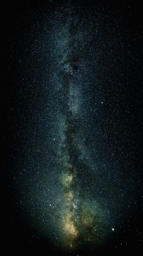

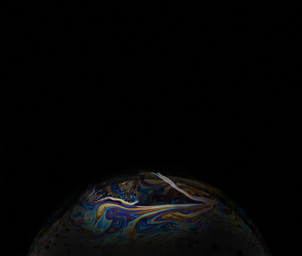

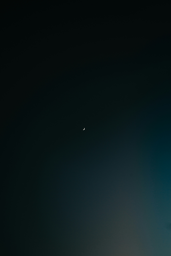

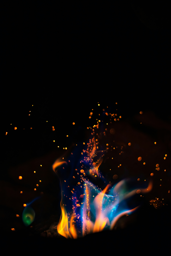

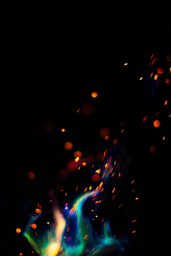

In [48]:
indices, values = get_similar_images(img_features, "iphone", k=5)
# datasets['photos'].iloc[indices]

In [37]:
datasets['photos'].iloc[indices]

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photo_width,photo_height,photo_aspect_ratio,photo_description,photographer_username,...,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence,blur_hash
1058,L3FHnmrPyCI,https://unsplash.com/photos/L3FHnmrPyCI,https://images.unsplash.com/photo-159066633888...,2020-05-28 11:46:15.534101,t,3456,5184,0.67,Forest at winter,maxokhrimenko,...,NaN,NaN,376782,2509,snow covered pine trees under white sky during...,NaN,NaN,NaN,NaN,L+HV*Xf6j]fQ_Noeafj[t7j[f7ay
7047,4ENFPMd4hUU,https://unsplash.com/photos/4ENFPMd4hUU,https://images.unsplash.com/photo-158012307115...,2020-01-27 11:04:59.37033,t,2631,3289,0.80,Frozen forest in the fog,jxk,...,NaN,NaN,9307495,12146,snow covered trees during daytime,NaN,NaN,NaN,NaN,LcO:@SRjWBj[~qt7ayj[9Fayayay
19992,Le1JlDtVi2Q,https://unsplash.com/photos/Le1JlDtVi2Q,https://images.unsplash.com/photo-1549057255-8...,2019-02-01 21:41:27.338526,t,6000,4000,1.50,small in a big world,wolfgang_hasselmann,...,NaN,NaN,939197,6531,selective focus photography of plant covered w...,NaN,NaN,NaN,NaN,L5PQ5C~q4Us;oua#Rif6?c8_M{t7
23577,ZAyvqmPDIQE,https://unsplash.com/photos/ZAyvqmPDIQE,https://images.unsplash.com/photo-159066634958...,2020-05-28 11:46:15.802243,t,5184,3456,1.50,Forest at winter,maxokhrimenko,...,NaN,NaN,12583878,14222,green pine trees covered with snow,NaN,NaN,NaN,NaN,"LgG+,XRjayoy~pjZWBay_3ofayay"
8767,Mi8ozXhtmqI,https://unsplash.com/photos/Mi8ozXhtmqI,https://images.unsplash.com/photo-158350367424...,2020-03-06 14:11:10.670183,t,7288,4732,1.54,"Blossoms, Jamaica Pond, 1952",bostonpubliclibrary,...,NaN,NaN,222970,1450,white cherry blossom in grayscale photography,NaN,NaN,NaN,NaN,L6Jb25t7D%xu~qt7t7%MM{xuayRj


['dinosaur', 'tortoise', 'turtle', 't-shirt', 'green', 'picket', 'lizard', 'tile', 'coyote', 'wire', 'figurine', 'crocodile', 'hat', 'gecko', 'colorful', 'money', 'hardwood', 'dung beetle', 'skin', 'wood', 'frog', 'universe', 'photo', 'painting', 'electrical device', 'organism', 'graphics', 'green lizard', 'space', 'mammal', 'playground', 'mouth', 'female', 'cricket insect', 'reptile', 'algae', 'outer space', 'fence', 'veiled chameleon', 'cactus', 'dirt road', 'octopus', 'hearth', 'accessory', 'tablecloth', 'snail', 'water', 'paint container', 'plant', 'alligator', 'flag', 'glass', 'chameleon', 'hook', 'globe', 'dark', 'sun hat', 'accessories', 'amphibian', 'fish', 'theme park', 'rubble', 'tattoo', 'tree frog', 'bubble', 'advertisement', 'art', 'cosmetics', 'tattoos', 'snake', 'finger', 'foam', 'road', 'pet', 'light', 'fractal', 'planet', 'animals', 'dramatic', 'plastic', 'box turtle', 'gravel', 'hole', 'symbol', 'iguana', 'play area', 'furniture', 'trademark', 'photography', 'dairy', 

In [7]:
img_features['arr_0'].shape

(20, 512)

In [ ]:
datasets['keywords'].groupby('photo_id').count()['keyword'].describe()

count    25000.00000
mean       106.64204
std         57.75203
min          8.00000
25%         71.00000
50%        125.00000
75%        133.00000
max       1042.00000
Name: keyword, dtype: float64

In [ ]:
print(datasets['keywords'][datasets['keywords']['photo_id'] == '2EDjes2hlZo'].keyword.tolist())

['obelisk', 'flora', 'tranquil', 'sky', 'tree', 'peaceful', 'forest', 'sunset', 'silhouette', 'afterglow', 'nature', 'outdoors', 'dusk', 'red sky', 'plant', 'water', 'beautiful', 'purple', 'love', 'woodland', 'paris', 'pond', 'river', 'washington', 'lake', 'reflection', 'peace', 'spiritual', 'dawn', 'quiet', 'still', 'orange', 'sunrise']


In [ ]:
datasets['keywords'][datasets['keywords']['photo_id'] == '2EDjes2hlZo'].sort_values(by=['ai_service_1_confidence'], ascending=False)

,photo_id,keyword,ai_service_1_confidence,ai_service_2_confidence,suggested_by_user
2530095,2EDjes2hlZo,sky,98.286400,96.064460,t
2530099,2EDjes2hlZo,sunset,98.286400,90.335940,t
2530102,2EDjes2hlZo,nature,98.286400,NaN,t
2530103,2EDjes2hlZo,outdoors,98.286400,NaN,t
2530104,2EDjes2hlZo,dusk,98.286400,NaN,t
2530105,2EDjes2hlZo,red sky,98.286400,NaN,f
2530120,2EDjes2hlZo,dawn,98.286400,87.445724,t
2530124,2EDjes2hlZo,sunrise,98.286400,90.253150,t
2530107,2EDjes2hlZo,water,57.606358,NaN,t
2530114,2EDjes2hlZo,river,57.606358,NaN,f


In [ ]:
datasets['conversions'][datasets['conversions']['photo_id'] == '2EDjes2hlZo'].keyword.value_counts()

sky                          4
sunset paris                 3
tuileries garden             3
obelisk                      2
japanese garden              2
dawn garden                  1
orange and purple sunrise    1
still pond                   1
paris sunset                 1
Sunset garden                1
sofa garden                  1
nature garden                1
paris                        1
paris tranquil               1
purple garden                1
fruit garden                 1
english garden               1
washington obelisco          1
japanese sunset              1
dawn                         1
フランス  夜明け                    1
garden sunset                1
japanese pond sunset         1
Name: keyword, dtype: int64

In [ ]:
datasets['keywords']['keyword'].value_counts()['espuma del mar']

KeyError: 'espuma del mar'

In [ ]:
keywords = datasets['keywords']['keyword'].value_counts()
kwords = set(keywords[keywords > 10].index.tolist())

In [ ]:
kwords

{'apparel',
 'king penguin',
 'lace',
 'bread loaf',
 'wok',
 'hot air balloon',
 'dial telephone',
 'orchestra',
 'pollution',
 'arial',
 'mountain view',
 'fine art',
 'working out',
 'cg artwork',
 'appenzeller',
 'fudge',
 'long hair',
 'dime',
 'swim',
 'cover',
 'bigtree',
 'lock screen background',
 'palm trees',
 'audience',
 'red sky',
 'seat',
 'forest path',
 'pretzel',
 'backgrounds',
 'dirt',
 'city light',
 'aquilegia',
 'in bloom',
 'mystical',
 'apartment',
 'automotive wheel system',
 'abandoned',
 'sea foam',
 'eibsee',
 'cockapoo',
 'hip',
 'mascara',
 'runway',
 'festival',
 'plectrum',
 'rock formation',
 'way',
 'sunglasses',
 'bay',
 '2019',
 'spinach',
 'cairns',
 'atlantic',
 'beige',
 'sapphire',
 'dolphin',
 'igloo',
 'tundra',
 'man',
 'bay area',
 'blue water',
 'icicle',
 'headrest',
 'outdoor',
 'foal',
 'lightning',
 'pinecone',
 'mousepad',
 'disk',
 'mystery',
 'organic',
 'bracelet',
 'boots',
 'exercise',
 'cafeteria',
 'manx',
 'landmark',
 'close',

In [ ]:
datasets['collections'].head(30)

,photo_id,collection_id,collection_title,photo_collected_at
0,--2IBUMom1I,3734077,Images,2018-12-30 00:56:45.223252
1,--2IBUMom1I,162470,Majestical Sunsets,2016-03-15 17:04:25.089589
2,--2IBUMom1I,9832457,business,2020-04-04 14:26:10.506402
3,--2IBUMom1I,4916417,PESSOAS,2019-06-01 04:20:40.076819
4,--2IBUMom1I,88441555,ROCANCOURT,2020-10-26 10:53:03.931209
5,--2IBUMom1I,4668070,Pose,2019-04-18 23:59:25.694862
6,--2IBUMom1I,4472213,People,2019-03-17 04:44:02.202423
7,--2IBUMom1I,2143051,Travel / Places,2018-05-22 23:20:05.898545
8,--2IBUMom1I,2140838,Референсы,2018-05-22 13:50:37.97289
9,--2IBUMom1I,1230101,Travel,2017-09-27 11:24:17.575047


In [ ]:
datasets['conversions'].groupby('photo_id').count()

,converted_at,conversion_type,keyword,anonymous_user_id,conversion_country
photo_id,,,,,
--2IBUMom1I,23,23,23,23,23
--6JlGcHl-w,9,9,9,9,9
--Jy_8mvs4E,157,157,157,157,157
--SDX4KWIbA,3915,3915,3915,3915,3898
--Tn3E5ZtfQ,720,720,720,720,719
...,...,...,...,...,...
zzW47lWoaAA,364,364,364,364,363
zzWCZDaeSRw,22,22,22,22,22
zzboOsdmQkY,17,17,17,17,17


In [ ]:
datasets['conversions'].head(50)
df_conv = datasets['conversions']['keyword', 'photo_id']

,converted_at,conversion_type,keyword,photo_id,anonymous_user_id,conversion_country
0,2022-12-01 00:29:12.239,download,bluebird,UsWjYe1FdlU,f9e3b04d-e9f1-4cfc-b966-f9d3fffaaf6c,BR
1,2022-12-01 00:47:29.394,download,textures jellyfish,wVG8CCQ20A0,f6caa123-3a55-452a-a4c7-882a110dcdb5,UA
2,2022-12-01 00:51:58.826,download,textures jellyfish,-ufym5Rdqs4,f6caa123-3a55-452a-a4c7-882a110dcdb5,UA
3,2022-12-01 00:58:33.701,download,dark clouds,VIcTzkzNZR8,9904569a-26e0-4607-8ee5-cc6d66a3aa9b,MX
4,2022-12-01 01:12:47.562,download,mountains,9wg5jCEPBsw,509ecea4-cda3-42f0-8e8d-cd1a4157261f,US
5,2022-12-01 01:18:07.569,download,feather wallpaper,YNUFtf4qyh0,f0bfb142-1bb3-48e5-8f46-714b5a0db636,US
6,2022-12-01 01:27:03.178,download,espuma del mar,1Hp_6AnkWkc,b789ccb2-b1cd-46d6-a882-845e4e34f2b3,PA
7,2022-12-01 01:52:55.46,download,underwater scary,T-AOFf2B8Zw,014439d0-6ba0-48ab-a6bb-d79606903697,RO
8,2022-12-01 02:15:24.29,download,surf,QTIugFX1Gug,31432a28-3fd6-458d-9567-c2f0a555333d,KR
9,2022-12-01 02:32:07.894,download,mountains,phIFdC6lA4E,da8532dc-f964-420c-b5ae-8501dc3c45cb,US


In [ ]:
conversion_photos = datasets['conversions']['photo_id'].value_counts()
conversion_photos[conversion_photos > 500]

oMpAz-DN-9I    97572
phIFdC6lA4E    72730
okVXy9tG3KY    67003
78A265wPiO4    58491
EPy0gBJzzZU    57307
               ...  
xhvNYC3lr9s      502
2wbG8ZbWjEs      501
Ij5mKyWLNX0      501
zScN11MYJcQ      501
Frjr1uH0qRM      501
Name: photo_id, Length: 2566, dtype: int64

In [ ]:
id = 'oMpAz-DN-9I'
datasets['conversions'][datasets['conversions'].photo_id == id]

,converted_at,conversion_type,keyword,photo_id,anonymous_user_id,conversion_country
504,2022-12-01 08:14:43.469,download,dream,oMpAz-DN-9I,318da761-f913-4293-ac86-cea09c655385,KR
961,2022-12-01 16:18:36.354,download,dream,oMpAz-DN-9I,52634c65-c75b-4cd0-8d40-4509864e4ccf,NaN
1045,2022-12-02 20:45:30.352,download,espacio,oMpAz-DN-9I,2aa0893f-31fa-4579-b176-2b230c7e8bd8,ES
1221,2022-12-01 18:25:35.404,download,thank you universe,oMpAz-DN-9I,342b9c7a-cb06-432e-a60d-3a479cdf0a74,LK
1518,2022-12-03 18:01:39.92,download,dream,oMpAz-DN-9I,0147b662-de73-44de-ab28-3cf67b2c5bc8,GB
...,...,...,...,...,...,...
9695391,2023-04-29 15:52:37.583,download,universe,oMpAz-DN-9I,b7dbe492-3ceb-4b10-a24a-1b95df285c9d,IN
9695409,2023-04-29 18:04:04.225,download,space,oMpAz-DN-9I,9cdb6615-bd1c-441e-8e2b-c9b3c3cc2acb,TR
9695418,2023-04-29 20:48:37.609,download,space,oMpAz-DN-9I,fd60053d-659f-4645-ae9f-846e955bf124,US
9695505,2023-04-30 09:09:10.459,download,universe,oMpAz-DN-9I,7c563139-9832-48c0-b526-fe968ed59fe9,IN


In [ ]:
datasets['conversions'].describe()

,converted_at,conversion_type,keyword,photo_id,anonymous_user_id,conversion_country
count,9695633,9695633,9695633,9695633,9695633,9622404
unique,9682061,1,634449,21477,4632198,235
top,2023-01-03 19:56:07.193,download,nature,oMpAz-DN-9I,3332a1db-1d1e-4c84-869b-482b9bd44151,US
freq,12,9695633,367567,97572,4095,1728872


<AxesSubplot:>

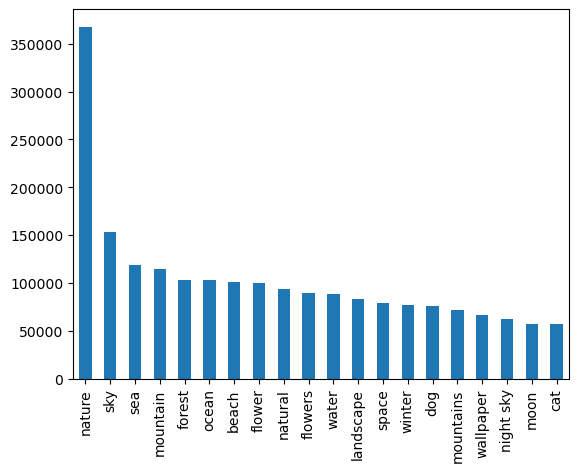

In [ ]:
datasets['conversions']['keyword'].value_counts()[:20].plot.bar()

<AxesSubplot:>

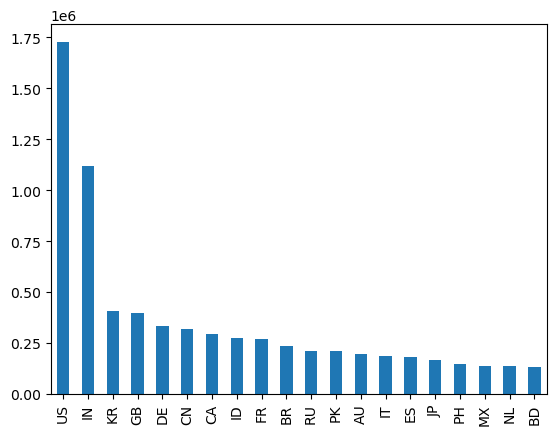

In [ ]:
datasets['conversions']['conversion_country'].value_counts()[:20].plot.bar()

<AxesSubplot:>

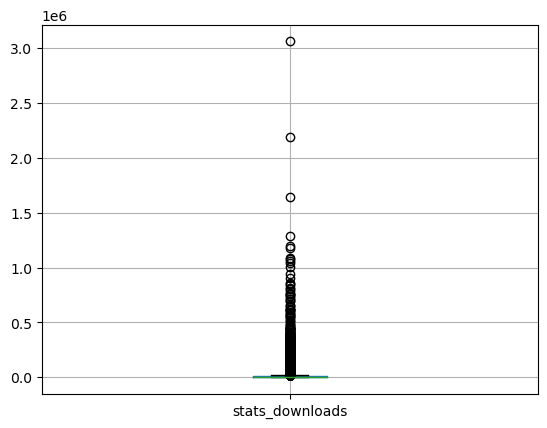

In [ ]:
datasets['photos'].boxplot(column=[ 'stats_downloads'])

In [ ]:
datasets['conversions']['anonymous_user_id'].value_counts()

3332a1db-1d1e-4c84-869b-482b9bd44151    4095
2820279f-4b30-4363-a3c1-5132f53524de    2192
51e6093d-ca9b-403a-b6f9-05f139693aac    1959
49c4eff5-ec0c-435d-9573-81064e129b62    1907
3d13b9d0-4000-45b7-8278-1140247c0fdd    1796
                                        ... 
a6054b06-f0ce-485b-8a64-26e025b8989d       1
a90ed4af-d508-4fa3-9919-d08cf56d253c       1
e2839b3a-07f2-4988-8ff8-59874b0ee31a       1
3b013d58-70c0-4d3c-93df-86bf7a1bb2f1       1
f95bff69-02c3-4520-ac50-491c5491268b       1
Name: anonymous_user_id, Length: 4632198, dtype: int64

In [ ]:
datasets['colors'].head()

,photo_id,hex,red,green,blue,keyword,ai_coverage,ai_score
0,5bigFVA8nDo,C4B1F7,196,177,247,lightsteelblue,0.006933,0.007985
1,5bigFVA8nDo,7A3A6A,122,58,106,dimgray,0.014400,0.003312
2,9Jtvio08V84,675145,103,81,69,darkolivegreen,0.074067,0.177135
3,b95kjjjjhHw,789FD5,120,159,213,cornflowerblue,0.003400,0.078048
4,b95kjjjjhHw,4579AF,69,121,175,steelblue,0.002600,0.049575
